<a href="https://colab.research.google.com/github/Deepakksingh-GIT/Video-Game-Sales-and-Engagement-Analysis/blob/main/Video_game_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
games = pd.read_csv("/content/games.csv")
sales = pd.read_csv("/content/vgsales.csv")

In [ ]:
#Drop unwanted column
games = games.drop(columns=["Unnamed: 0"], errors="ignore")

In [ ]:
 #Column names format
games.columns = games.columns.str.strip().str.title().str.replace(" ", "_")

In [ ]:
#Remove duplicate values
games = games.drop_duplicates()


In [ ]:
#Remove duplicate column
games = games.T.drop_duplicates().T


In [ ]:
# Removing [], (,) and (/)

games['Reviews'] = games['Reviews'].str.replace(r"[\[\]]", "", regex=True)
games['Reviews'] = games['Reviews'].str.replace(r"[\"']", "", regex=True)

games['Genres'] = games['Genres'].str.replace(r"[\[\]]", "", regex=True)
games['Genres'] = games['Genres'].str.replace(r"[\"']", "", regex=True)

games['Team'] = games['Team'].str.replace(r"[\"']", "", regex=True)
games['Team'] = games['Team'].str.replace(r"[\[\]]", "", regex=True)

In [ ]:
# 'K' को हटाकर 1000 से multiply

# Times_Listed column
games['Times_Listed'] = games['Times_Listed'].astype(str)
games['Times_Listed'] = games['Times_Listed'].str.replace("K", "")
games['Times_Listed'] = games['Times_Listed'].astype(float) * 1000
games['Times_Listed'] = games['Times_Listed'].astype(int)

# Plays column
games['Plays'] = games['Plays'].astype(str)
games['Plays'] = games['Plays'].str.replace("K", "")
games['Plays'] = games['Plays'].astype(float) * 1000
games['Plays'] = games['Plays'].astype(int)

# Playing column
games['Playing'] = games['Playing'].astype(str)
games['Playing'] = games['Playing'].str.replace("K", "")
games['Playing'] = games['Playing'].astype(float) * 1000
games['Playing'] = games['Playing'].astype(int)

# Backlogs column
games['Backlogs'] = games['Backlogs'].astype(str)
games['Backlogs'] = games['Backlogs'].str.replace("K", "")
games['Backlogs'] = games['Backlogs'].astype(float) * 1000
games['Backlogs'] = games['Backlogs'].astype(int)

# Wishlist column
games['Wishlist'] = games['Wishlist'].astype(str)
games['Wishlist'] = games['Wishlist'].str.replace("K", "")
games['Wishlist'] = games['Wishlist'].astype(float) * 1000
games['Wishlist'] = games['Wishlist'].astype(int)

print(games[['Times_Listed','Plays','Playing','Backlogs','Wishlist']].head())



   Times_Listed  Plays  Playing  Backlogs  Wishlist
0          3900  17000     3800      4600      4800
1          2900  21000     3200      6300      3600
2          4300  30000     2500      5000      2600
3          3500  28000   679000      4900      1800
4          3000  21000     2400      8300      2300


In [ ]:
#Formatting Year into YYYY-MM-DD
games['Release_Date'] = pd.to_datetime(games['Release_Date'], errors='coerce')
games['Release_Date'] = games['Release_Date'].fillna(pd.Timestamp("1900-01-01"))
games['Release_Date'] = games['Release_Date'].dt.strftime('%Y-%m-%d')


In [ ]:
#Avoiding warning
import warnings
warnings.filterwarnings("ignore")


In [ ]:
games['Rating'] = games['Rating'].fillna(0.0)
games['Summary'] = games['Summary'].fillna("No Summary Available")

In [ ]:
print(games.isnull().sum())


Title           0
Release_Date    0
Team            0
Rating          0
Times_Listed    0
Genres          0
Summary         0
Reviews         0
Plays           0
Playing         0
Backlogs        0
Wishlist        0
dtype: int64


In [ ]:
games.head(1)

,Title,Release_Date,Team,Rating,Times_Listed,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1130 entries, 0 to 1511
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1130 non-null   object 
 1   Release_Date  1130 non-null   object 
 2   Team          1130 non-null   object 
 3   Rating        1130 non-null   float64
 4   Times_Listed  1130 non-null   int64  
 5   Genres        1130 non-null   object 
 6   Summary       1130 non-null   object 
 7   Reviews       1130 non-null   object 
 8   Plays         1130 non-null   int64  
 9   Playing       1130 non-null   int64  
 10  Backlogs      1130 non-null   int64  
 11  Wishlist      1130 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 147.1+ KB


In [ ]:
games = games.drop(columns=["Unnamed: 0"], errors="ignore")


In [ ]:
games.head(10)

,Title,Release_Date,Team,Rating,Times_Listed,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800
1,Hades,2019-12-10,Supergiant Games,4.3,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,This game is the game (that is not CS:GO) that...,30000,2500,5000,2600
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",soundtrack is tied for #1 with nier automata. ...,28000,679000,4900,1800
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"this games worldbuilding is incredible, with i...",21000,2400,8300,2300
5,Minecraft,2011-11-18,Mojang Studios,4.3,2300,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,33000,1800,1100,230000
6,Omori,2020-12-25,"OMOCAT, PLAYISM",4.2,1600,"Adventure, Indie, RPG, Turn Based Strategy",A turn-based surreal horror RPG in which a chi...,"The best game Ive played in my life, omori is ...",7200,1100,4500,3800
7,Metroid Dread,2021-10-07,"Nintendo, MercurySteam",4.3,2100,"Adventure, Platform",Join intergalactic bounty hunter Samus Aran in...,Have only been a Metroid fan for couple of yea...,9200,759000,3400,3300
8,Among Us,2018-06-15,InnerSloth,3.0,867000,"Indie, Strategy",Join your crew-mates in a multiplayer game of ...,its a solid party game. im bad at lying though...,25000,470000,776000,126000
9,NieR: Automata,2017-02-23,"PlatinumGames, Square Enix",4.3,2900,"Brawler, RPG","NieR: Automata tells the story of androids 2B,...","Holy shit, im carrying the weight of the woooo...",18000,1100,6200,3600


In [ ]:
#Save cleaned_games data
games.to_csv("games_clean.csv", index=False)


In [ ]:
sales.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [ ]:
print(sales.isnull().sum())


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [ ]:
# Missing values handle
sales['Year'] = pd.to_numeric(sales['Year'], errors='coerce').fillna(0).astype(int)
sales['Publisher'] = sales['Publisher'].fillna("Unknown")


In [ ]:
# Year को date में convert करना
sales['Year'] = pd.to_numeric(sales['Year'], errors='coerce')
sales['Year'] = pd.to_datetime(sales['Year'], format='%Y', errors='coerce')  # YYYY को datetime
sales['Year'] = sales['Year'].dt.strftime('%Y-%m-%d')  # YYYY-MM-DD

In [ ]:
sales.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [ ]:
print(games.columns)
print(sales.columns)


Index(['Title', 'Release_Date', 'Team', 'Rating', 'Times_Listed', 'Genres',
       'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist'],
      dtype='object')
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [ ]:
print(games['Title'].head(10))
print(sales['Name'].head(10))

0                                 Elden Ring
1                                      Hades
2    The Legend of Zelda: Breath of the Wild
3                                  Undertale
4                              Hollow Knight
5                                  Minecraft
6                                      Omori
7                              Metroid Dread
8                                   Among Us
9                             NieR: Automata
Name: Title, dtype: object
0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: Name, dtype: object


In [ ]:
print("Games unique titles:", games['Title'].nunique())
print("Sales unique names:", sales['Name'].nunique())


Games unique titles: 1099
Sales unique names: 11493


In [ ]:
common_titles = set(games['Title']).intersection(set(sales['Name']))
print("Common titles:", len(common_titles))


Common titles: 458


In [ ]:
#datasets make common clean column
# Games dataset
games['clean_title'] = games['Title'].str.strip().str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True)

# Sales dataset
sales['clean_title'] = sales['Name'].str.strip().str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True)


In [ ]:
# Year column clean
sales['Year'] = pd.to_numeric(sales['Year'], errors='coerce')  # number में convert
sales['Year'] = pd.to_datetime(sales['Year'], format='%Y', errors='coerce')  # YYYY -> datetime
sales['Year'] = sales['Year'].dt.strftime('%Y-%m-%d')  # YYYY-01-01 format

# Publisher missing fill
sales['Publisher'] = sales['Publisher'].fillna("Unknown")

# Save cleaned sales data
sales.to_csv("sales_clean.csv", index=False)

print("sales_clean.csv saved successfully")


sales_clean.csv saved successfully


In [ ]:
common_titles = set(games['clean_title']).intersection(set(sales['clean_title']))
print("Common titles count:", len(common_titles))

print(list(common_titles)[:20])


Common titles count: 483
['lego batman 3 beyond gotham', 'nba jam', 'tetris', 'dragon ball xenoverse', 'luigis mansion dark moon', 'kirby super star ultra', 'the legend of zelda majoras mask 3d', 'donkey kong country tropical freeze', 'donkey kong country returns', 'castlevania iii draculas curse', 'danganronpa another episode ultra despair girls', 'grand theft auto iv', 'far cry 3', 'the elder scrolls iii morrowind', 'fire emblem radiant dawn', 'goldeneye 007', 'final fantasy v', 'billy hatcher and the giant egg', 'crash bandicoot', 'ys the oath in felghana']


In [ ]:
# Merge on clean_title
merged_df = pd.merge(
    games,
    sales,
    how='inner',         # only common 458 titles आएंगे
    left_on='clean_title',
    right_on='clean_title'
)

# Unwanted duplicate column हटाओ
merged_df.drop(columns=['Name'], inplace=True)

print("Merged shape:", merged_df.shape)
print("Sample merged data:\n", merged_df.head())


In [ ]:
# Merge on clean_title
merged_df = pd.merge(games, sales, how='inner', left_on='clean_title', right_on='clean_title')



In [ ]:
# Duplicate column 'Name'
merged_df.drop(columns=['Name'], inplace=True)



In [ ]:
# Merge check
print("Merged shape:", merged_df.shape)
print(merged_df[['Title', 'clean_title', 'Platform', 'Year', 'Global_Sales']].head())

Merged shape: (1072, 23)
       Title clean_title Platform Year  Global_Sales
0  Minecraft   minecraft     X360  NaN          9.20
1  Minecraft   minecraft      PS3  NaN          5.42
2  Minecraft   minecraft      PS4  NaN          4.02
3  Minecraft   minecraft     XOne  NaN          2.41
4  Minecraft   minecraft      PSV  NaN          2.25


In [ ]:

# Save merged dataset
merged_df.to_csv("merged_games_sales.csv", index=False)
print("merged_games_sales.csv saved")

merged_games_sales.csv saved


In [ ]:
print("Duplicates in merged:", merged_df.duplicated().sum())


Duplicates in merged: 0


In [ ]:
#Basis check

print(merged_df.info())
print(merged_df.head())
print(merged_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1072 non-null   object 
 1   Release_Date  1072 non-null   object 
 2   Team          1072 non-null   object 
 3   Rating        1072 non-null   float64
 4   Times_Listed  1072 non-null   int64  
 5   Genres        1072 non-null   object 
 6   Summary       1072 non-null   object 
 7   Reviews       1072 non-null   object 
 8   Plays         1072 non-null   int64  
 9   Playing       1072 non-null   int64  
 10  Backlogs      1072 non-null   int64  
 11  Wishlist      1072 non-null   int64  
 12  clean_title   1072 non-null   object 
 13  Rank          1072 non-null   int64  
 14  Platform      1072 non-null   object 
 15  Year          0 non-null      object 
 16  Genre         1072 non-null   object 
 17  Publisher     1072 non-null   object 
 18  NA_Sales      1072 non-null 

In [ ]:
merged_df.to_csv("merged_games_sales.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

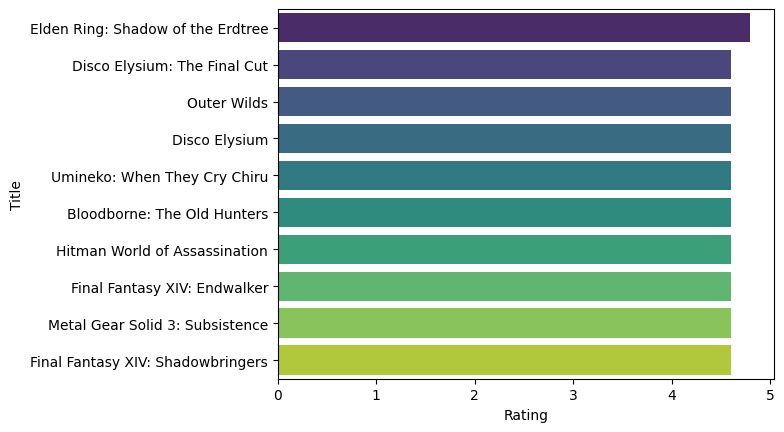

In [ ]:
# 1 What are the top-rated games by user reviews?
# Top 10 rated games

top_rated = games.nlargest(10, 'Rating')

sns.barplot(x='Rating', y='Title', data=top_rated, palette='viridis', hue=top_rated['Title'], dodge=False, legend=False)
plt.show()

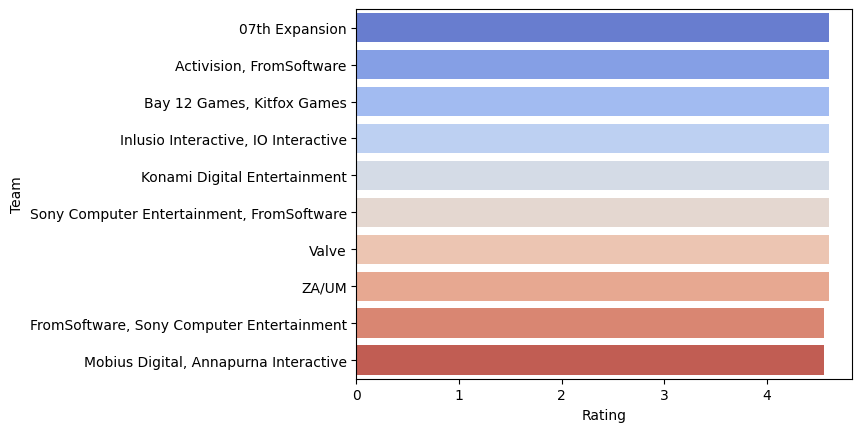

In [ ]:
# 2 Top 10 developers (Teams) by average rating
top_teams = games.groupby('Team')['Rating'].mean().nlargest(10).reset_index()

# Horizontal bar chart
sns.barplot(x='Rating', y='Team', data=top_teams, palette='coolwarm', hue=top_teams['Team'], dodge=False, legend=False)
plt.show()

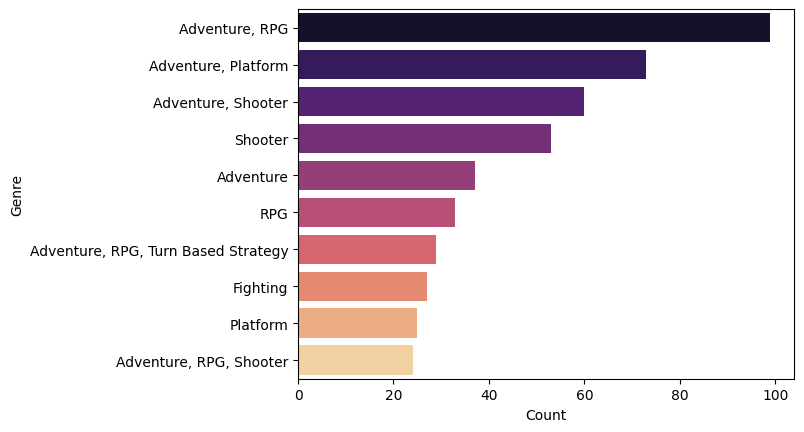

In [ ]:
# 3 Top 10 most common genres
top_genres = games['Genres'].value_counts().nlargest(10).reset_index()
top_genres.columns = ['Genre','Count']

# Horizontal bar chart (warning suppressed)
sns.barplot(x='Count', y='Genre', data=top_genres, palette='magma',
            hue=top_genres['Genre'], dodge=False, legend=False)
plt.show()

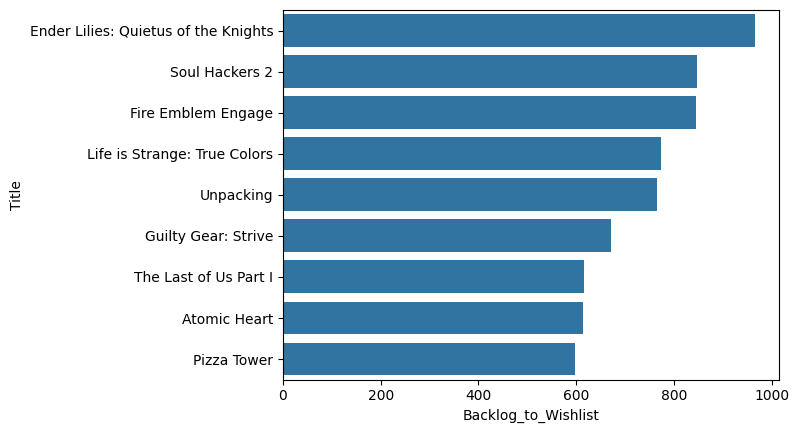

In [ ]:
# 4 Top 10 games by backlog/wishlist ratio
games['Backlog_to_Wishlist'] = games['Backlogs'] / (games['Wishlist'] + 1)
top_backlog = games.nlargest(10, 'Backlog_to_Wishlist')

# Horizontal bar chart
sns.barplot(x='Backlog_to_Wishlist', y='Title', data=top_backlog)
plt.show()

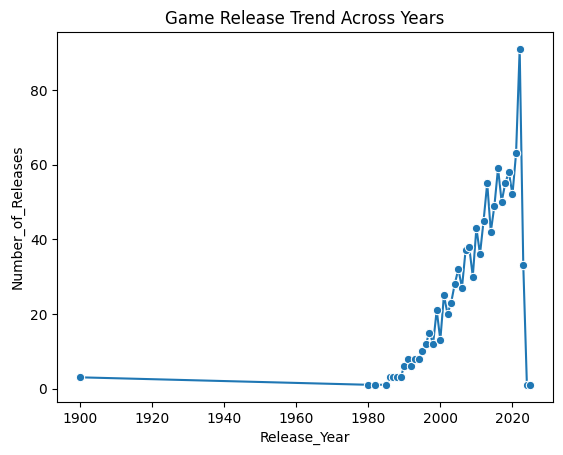

In [ ]:
# 5 Count games per year
games['Release_Year'] = pd.to_datetime(games['Release_Date']).dt.year
release_trend = games.groupby('Release_Year').size().reset_index(name='Number_of_Releases')

# Line chart
sns.lineplot(x='Release_Year', y='Number_of_Releases', data=release_trend, marker='o')
plt.title("Game Release Trend Across Years")
plt.show()

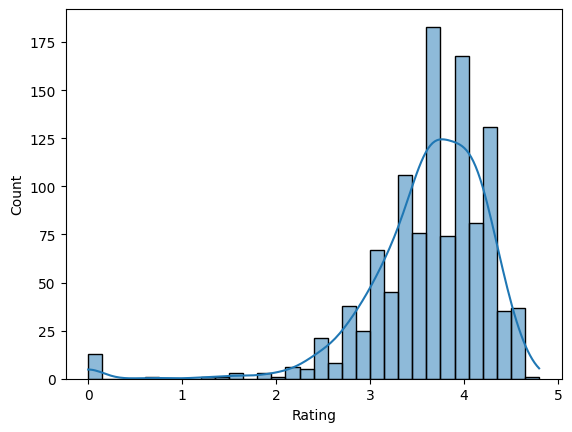

In [ ]:
sns.histplot(games['Rating'], kde=True)
plt.show()

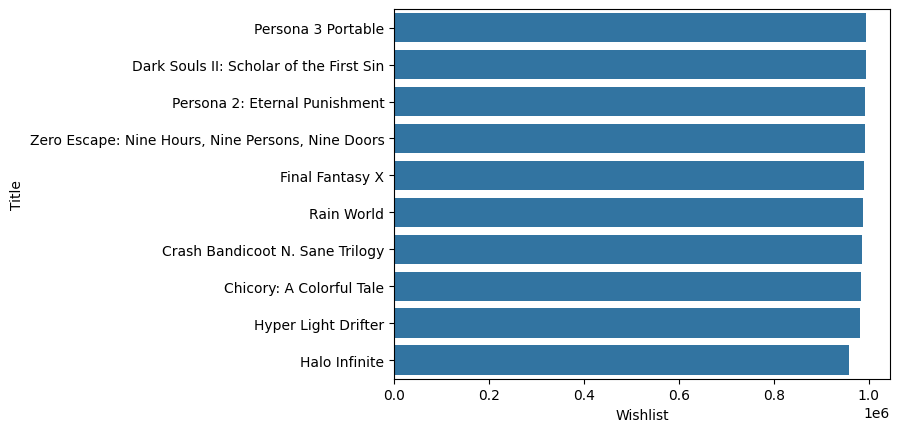

In [ ]:
# 7 What are the top 10 most wishlisted games?
# Top 10 most wishlisted games

top_wishlist = games.nlargest(10, 'Wishlist')

# Horizontal bar chart
sns.barplot(x='Wishlist', y='Title', data=top_wishlist)
plt.show()


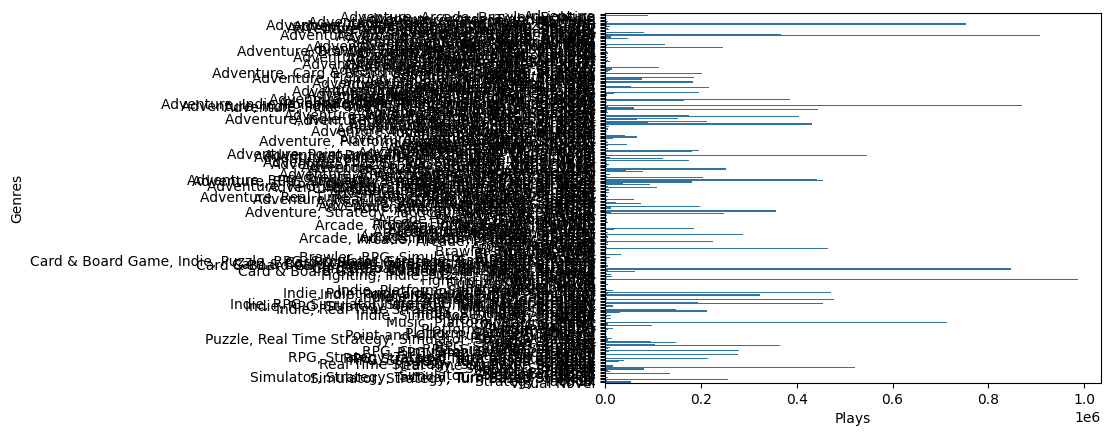

In [ ]:
#8 What’s the average number of plays per genre?
# Average plays per genre
avg_plays = games.groupby('Genres')['Plays'].mean().reset_index()

# Horizontal bar chart
sns.barplot(x='Plays', y='Genres', data=avg_plays)
plt.show()


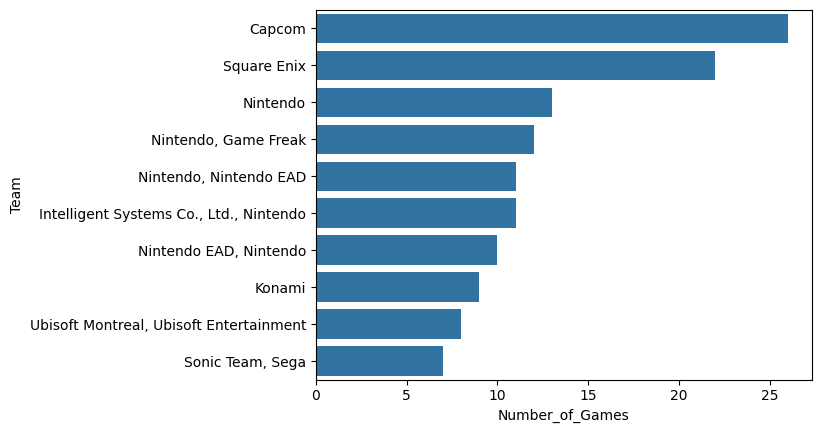

In [ ]:
# 9 Which developer studios are the most productive and impactful?
# Top 10 productive developer studios
top_dev = games['Team'].value_counts().nlargest(10).reset_index()
top_dev.columns = ['Team','Number_of_Games']

# Horizontal bar chart
sns.barplot(x='Number_of_Games', y='Team', data=top_dev)
plt.show()

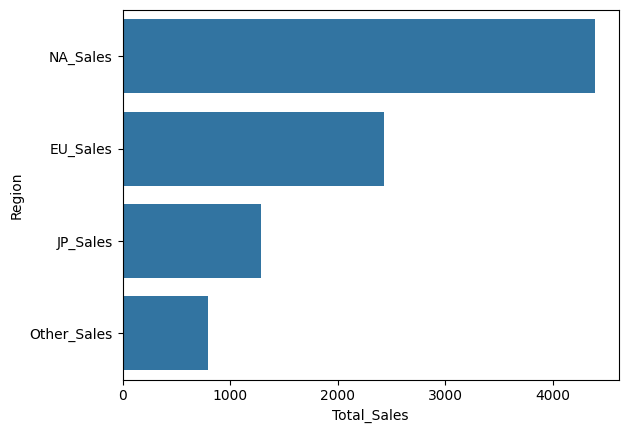

In [ ]:
# 10 Which region generates the most game sales?
# Sum of sales per region
region_sales = sales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
region_sales.columns = ['Region','Total_Sales']

# Horizontal bar chart
sns.barplot(x='Total_Sales', y='Region', data=region_sales)
plt.show()

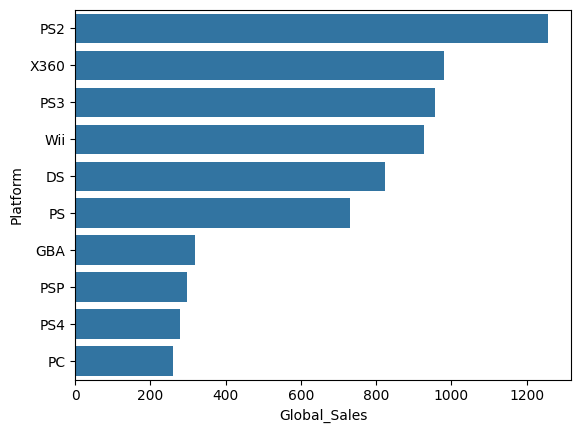

In [ ]:
# Total global sales per platform
platform_sales = sales.groupby('Platform')['Global_Sales'].sum().nlargest(10).reset_index()

# Horizontal bar chart
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales)
plt.show()

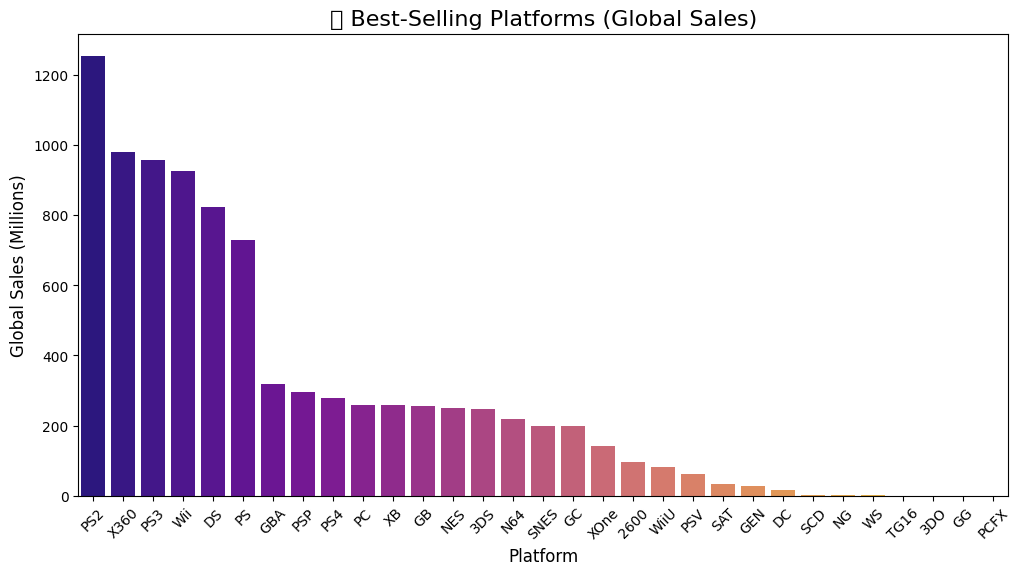

In [ ]:
# 11 Platform-wise total global sales
platform_sales = sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="plasma")
plt.title("🕹️ Best-Selling Platforms (Global Sales)", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


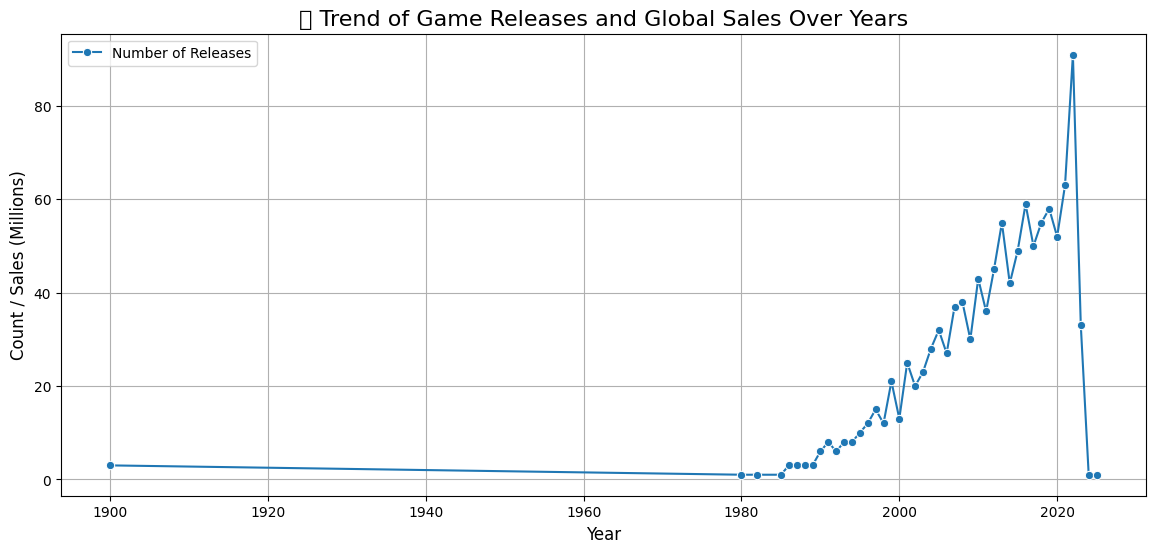

In [ ]:
#12 What’s the trend of game releases and sales over years?
# Total Global Sales per year
sales['Year'] = pd.to_datetime(sales['Year'], errors='coerce')
sales_per_year = sales.groupby(sales['Year'].dt.year)['Global_Sales'].sum()

# Number of game releases per year
games['Release_Date'] = pd.to_datetime(games['Release_Date'], errors='coerce')
releases_per_year = games.groupby(games['Release_Date'].dt.year).size()

# Plotting
plt.figure(figsize=(14,6))

sns.lineplot(x=releases_per_year.index, y=releases_per_year.values, marker='o', label='Number of Releases')
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values, marker='o', label='Total Global Sales')

plt.title("Trend of Game Releases and Global Sales Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count / Sales (Millions)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

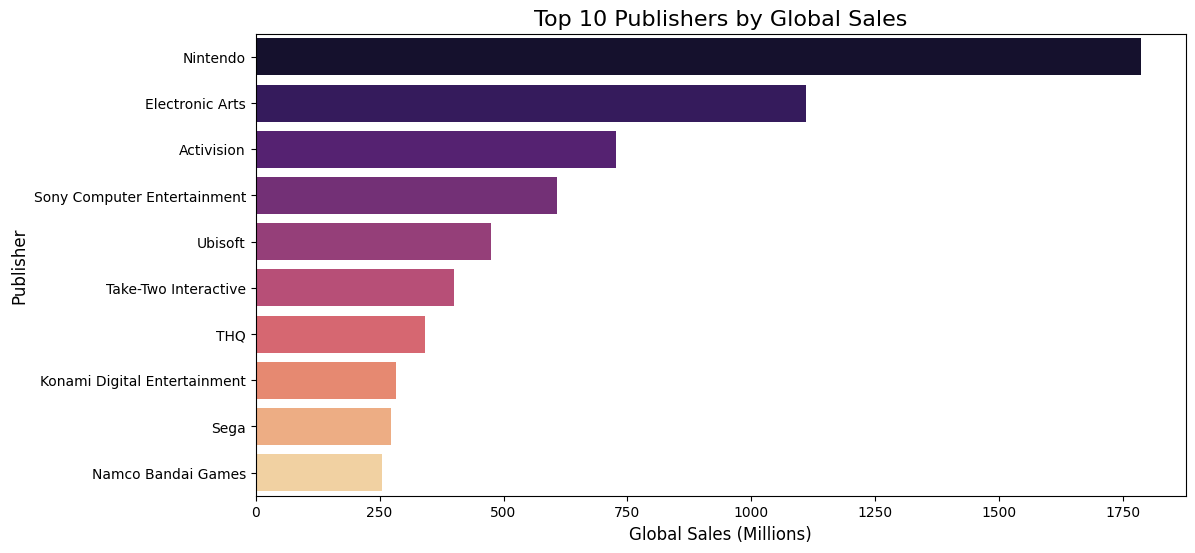

In [ ]:
# 13 Aggregate Global Sales by Publisher
# Take top 10 publishers
top_publishers = publisher_sales.head(10)

# Plotting Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="magma")
plt.title("Top 10 Publishers by Global Sales", fontsize=16)
plt.xlabel("Global Sales (Millions)", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.show()

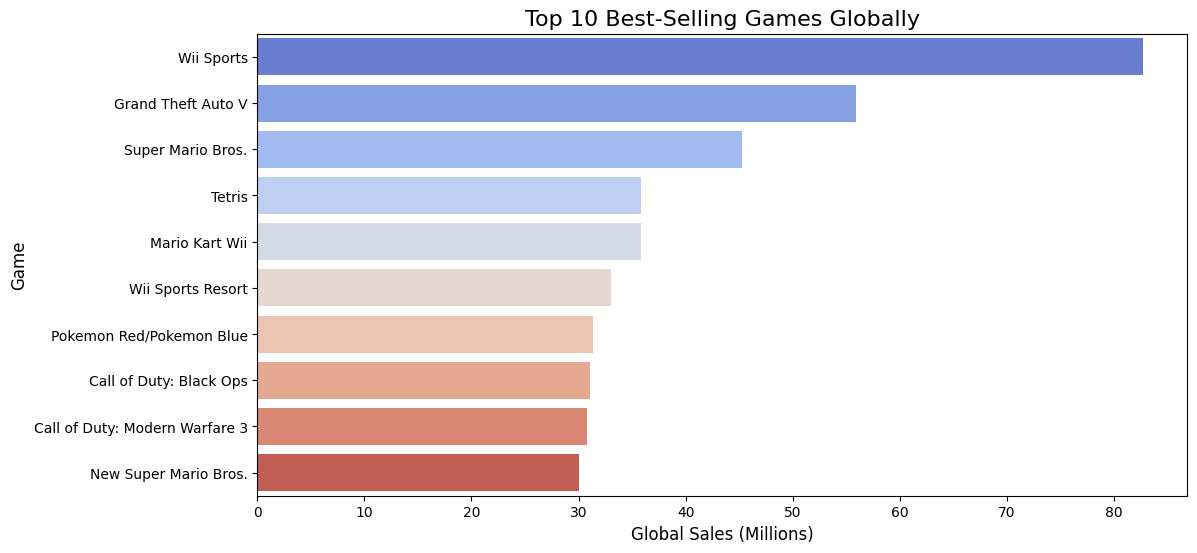

In [ ]:
# 14 Which games are the top 10 best-sellers globally?
# Top 10 games by Global Sales
top_games = sales.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Plotting Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_games.values, y=top_games.index, palette="coolwarm")
plt.title("Top 10 Best-Selling Games Globally", fontsize=16)
plt.xlabel("Global Sales (Millions)", fontsize=12)
plt.ylabel("Game", fontsize=12)
plt.show()

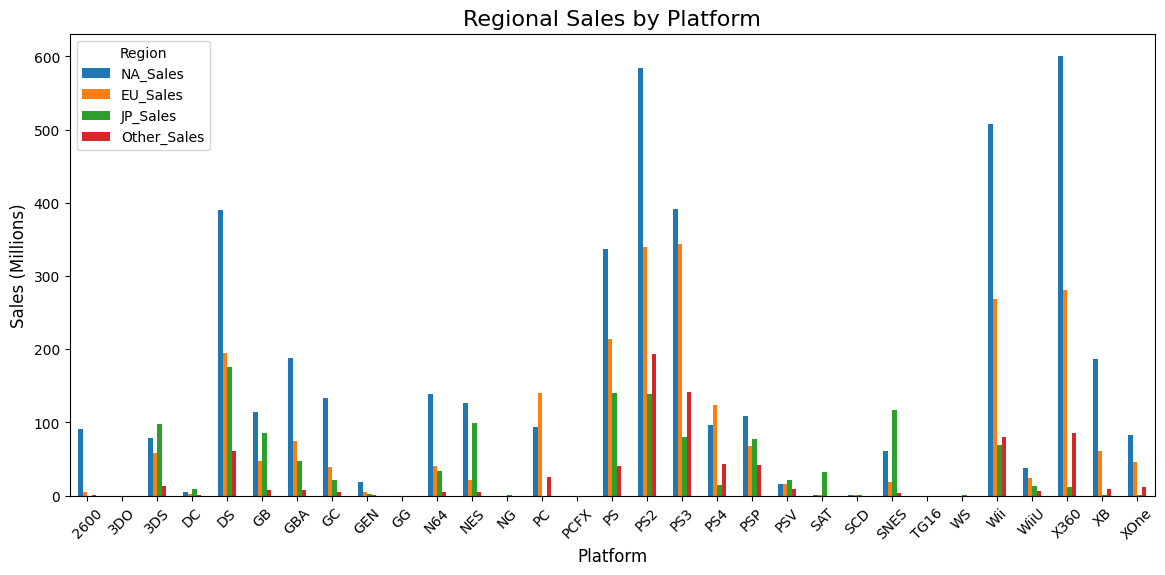

In [ ]:
# 15 How do regional sales compare for specific platforms?
# 15 Aggregate regional sales per platform
platform_region_sales = sales.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

# Plotting grouped bar chart
platform_region_sales.plot(kind='bar', figsize=(14,6))
plt.title("Regional Sales by Platform", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

In [ ]:
# 16 How has the market evolved by platform over time?
# Aggregate Global Sales by Year and Platform



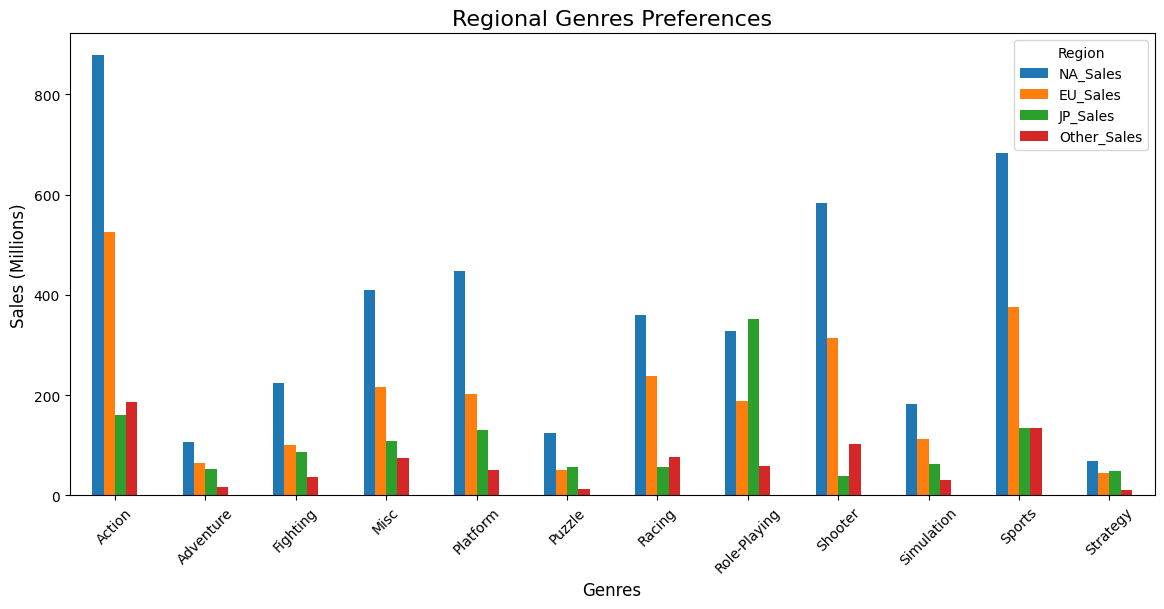

In [ ]:
# 17 What are the regional genre preferences?
# Aggregate regional sales by Genre
sales = pd.read_csv("/content/sales_clean.csv") # Reload the sales data
genre_region_sales = sales.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

# Plotting grouped bar chart
genre_region_sales.plot(kind='bar', figsize=(14,6))
plt.title("Regional Genres Preferences", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Sales (Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.show()

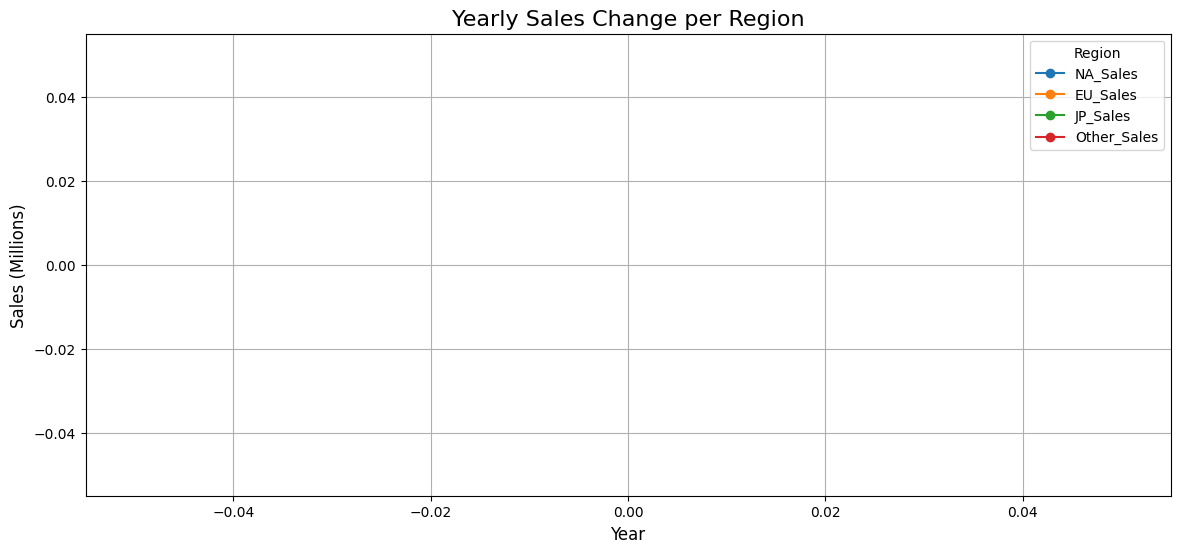

In [ ]:
# 18 What’s the yearly sales change per region?
# Aggregate regional sales per year
yearly_region_sales = sales.groupby('Year_Only')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

plt.figure(figsize=(14,6))
for col in yearly_region_sales.columns:
    plt.plot(yearly_region_sales.index, yearly_region_sales[col], marker='o', label=col)

plt.title("Yearly Sales Change per Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales (Millions)", fontsize=12)
plt.legend(title="Region")
plt.grid(True)
plt.show()

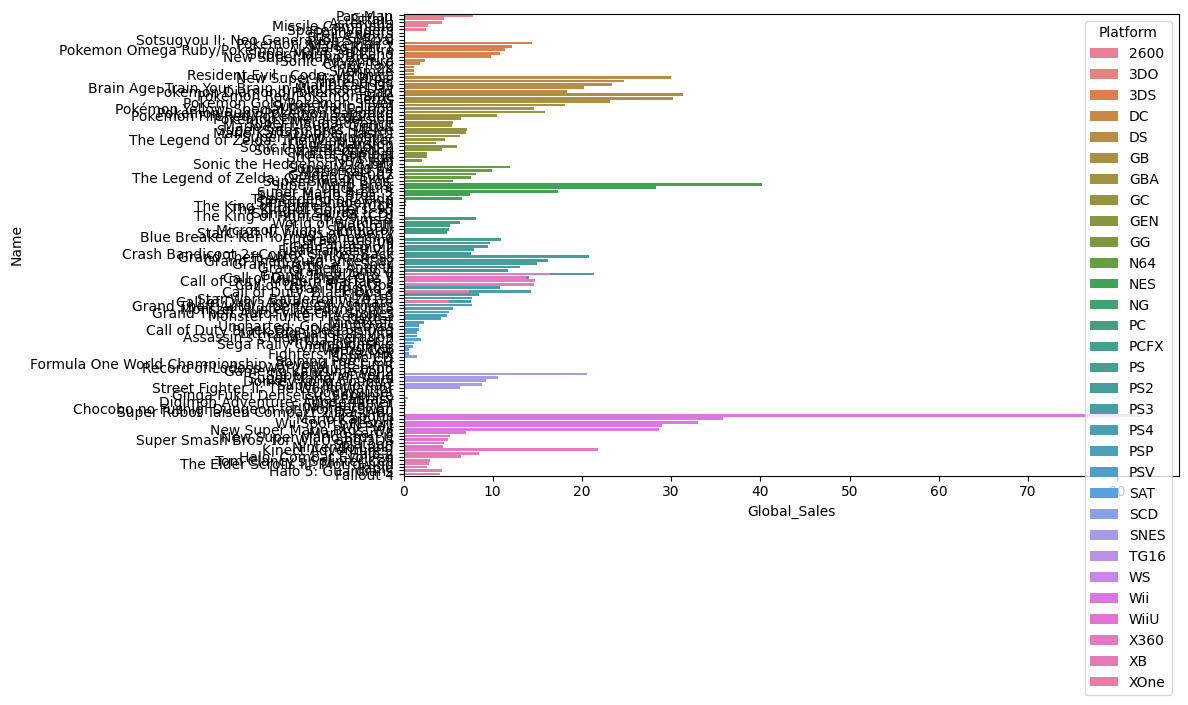

In [ ]:
# 20 What are the top 5 best-selling games per platform?
# Top 5 best-selling games per platform
top_games_platform = sales.groupby('Platform', group_keys=False).apply(lambda x: x.sort_values('Global_Sales', ascending=False).head(5))

# Horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Global_Sales', y='Name', hue='Platform', data=top_games_platform, dodge=False)
plt.show()


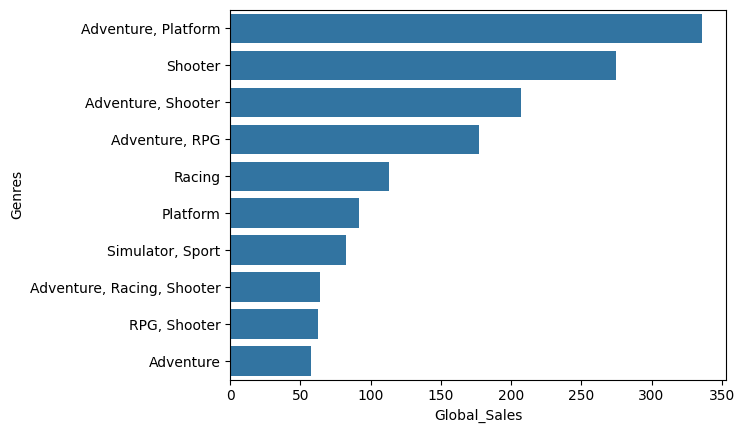

In [ ]:
# Which game genres generate the most global sales?
top_genre_sales = merged_df.groupby('Genres')['Global_Sales'].sum().nlargest(10).reset_index()
sns.barplot(x='Global_Sales', y='Genres', data=top_genre_sales)
plt.show()

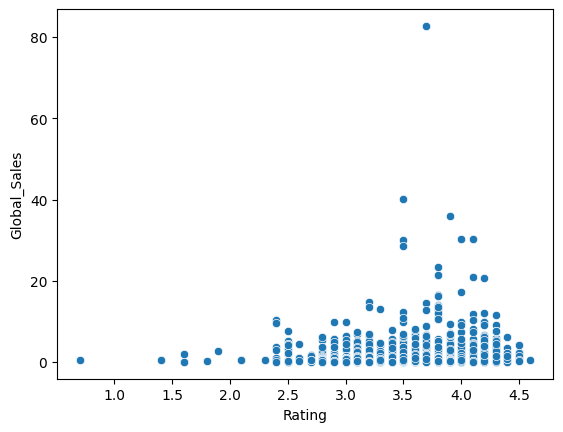

In [ ]:
# How does user rating affect global sales?
sns.scatterplot(x='Rating', y='Global_Sales', data=merged_df)
plt.show()

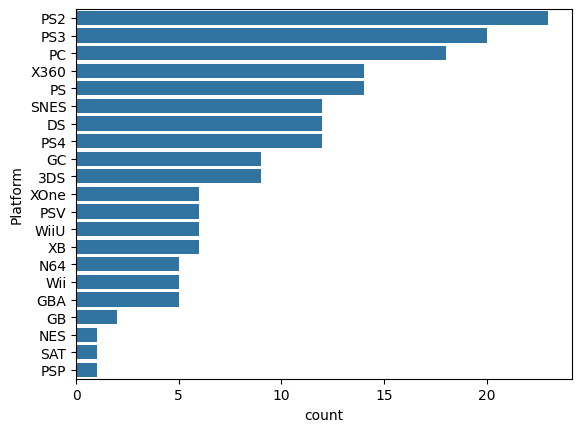

In [ ]:
# Platforms with most games having high ratings (Rating > 4)
high_rating = merged_df[merged_df['Rating']>4]
sns.countplot(y='Platform', data=high_rating, order=high_rating['Platform'].value_counts().index)
plt.show()

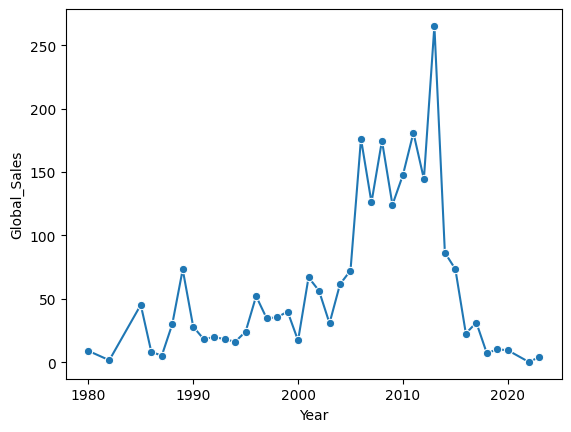

In [ ]:
# Trend of releases and sales over time
merged_df['Year'] = pd.to_datetime(merged_df['Release_Date'], errors='coerce').dt.year
trend_sales = merged_df.groupby('Year')['Global_Sales'].sum().reset_index()
sns.lineplot(x='Year', y='Global_Sales', data=trend_sales, marker='o')
plt.show()

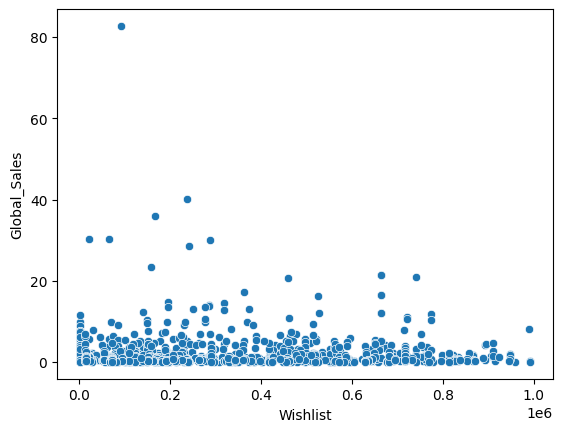

In [ ]:
# 25 Do highly wishlisted games lead to more sales?
sns.scatterplot(x='Wishlist', y='Global_Sales', data=merged_df)
plt.show()

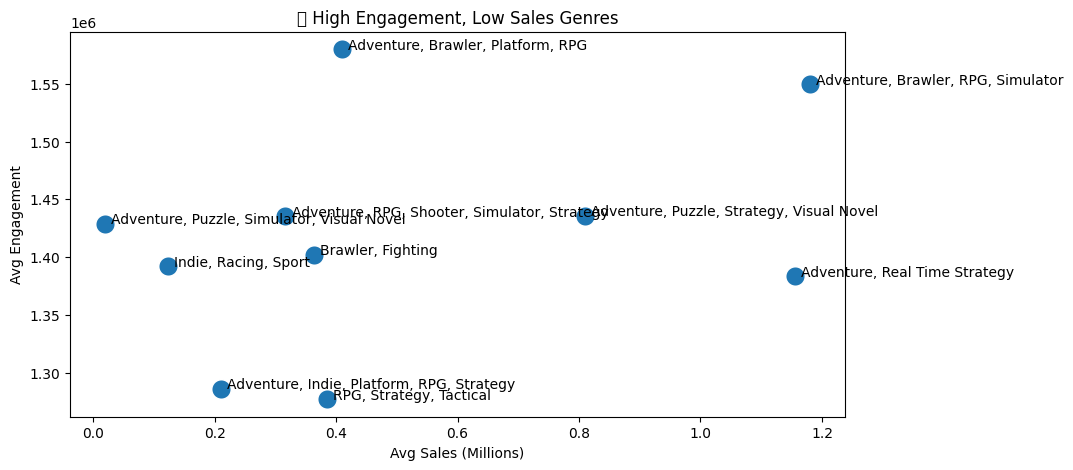

In [ ]:
# 26 Which genres have the highest engagement but lowest sales?
# Fill NaNs
for col in ['Global_Sales','Plays','Playing','Backlogs','Wishlist']:
    merged_df[col] = merged_df[col].fillna(0)

# Total engagement
merged_df['Total_Engagement'] = merged_df[['Plays','Playing','Backlogs','Wishlist']].sum(axis=1)

# Top 10 genres: high engagement, low sales
df = merged_df.groupby('Genres')[['Total_Engagement','Global_Sales']].mean()
df = df.sort_values(['Total_Engagement','Global_Sales'], ascending=[False, True]).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='Global_Sales', y='Total_Engagement', data=df, s=200)
for i, txt in enumerate(df.index):
    plt.text(df['Global_Sales'][i]+0.01, df['Total_Engagement'][i], txt)
plt.xlabel("Avg Sales (Millions)")
plt.ylabel("Avg Engagement")
plt.title("🎮 High Engagement, Low Sales Genres")
plt.show()

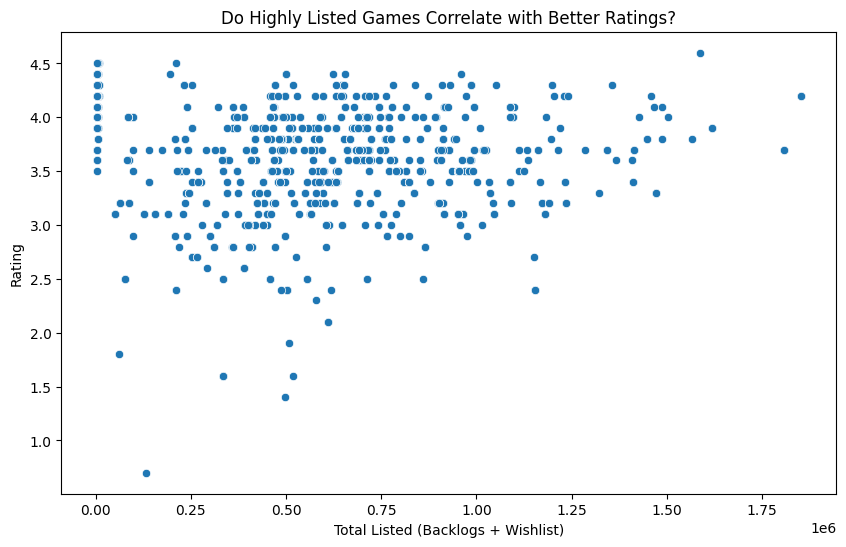

In [ ]:
# 27 Do highly listed games (wishlist/backlogs) correlate with better ratings?
# Fill missing values
for col in ['Backlogs','Wishlist','Rating']:
    merged[col] = merged[col].fillna(0)

# Total listed (wishlist + backlogs)
merged['Total_Listed'] = merged['Backlogs'] + merged['Wishlist']

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total_Listed', y='Rating', data=merged)
plt.xlabel("Total Listed (Backlogs + Wishlist)")
plt.ylabel("Rating")
plt.title("Do Highly Listed Games Correlate with Better Ratings?")
plt.show()


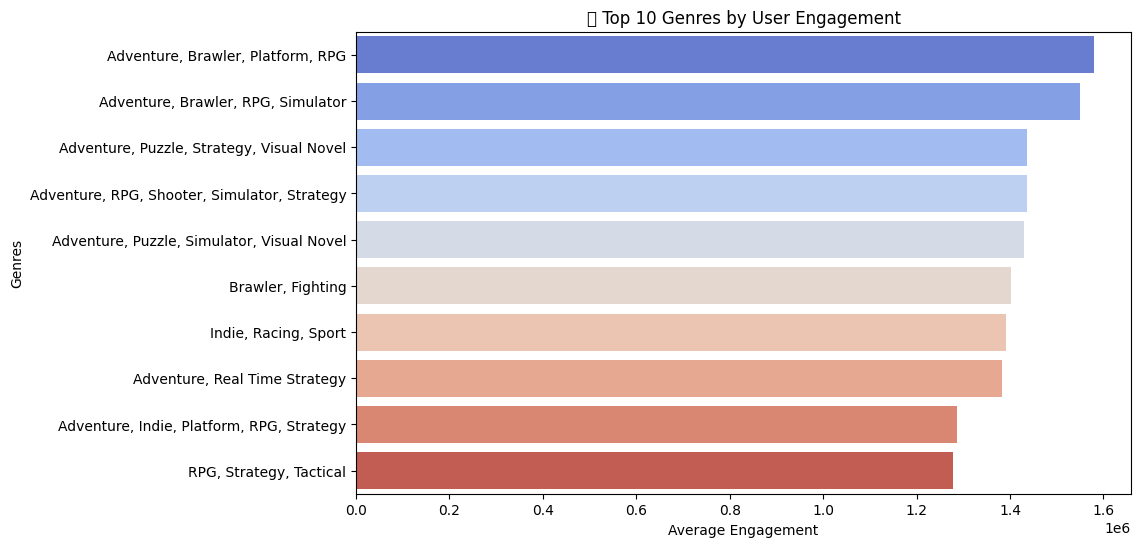

In [ ]:
# 28 How does user engagement differ across genres?
# Fill missing values
for col in ['Plays','Playing','Backlogs','Wishlist']:
    merged[col] = merged[col].fillna(0)

# Total engagement per game
merged['Total_Engagement'] = merged[['Plays','Playing','Backlogs','Wishlist']].sum(axis=1)

# Average engagement per genre
genre_engagement = merged.groupby('Genres')['Total_Engagement'].mean().sort_values(ascending=False).head(10)

# Horizontal bar chart (more readable)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_engagement.values, y=genre_engagement.index, palette="coolwarm")
plt.xlabel("Average Engagement")
plt.ylabel("Genres")
plt.title("Top 10 Genres by User Engagement")
plt.show()


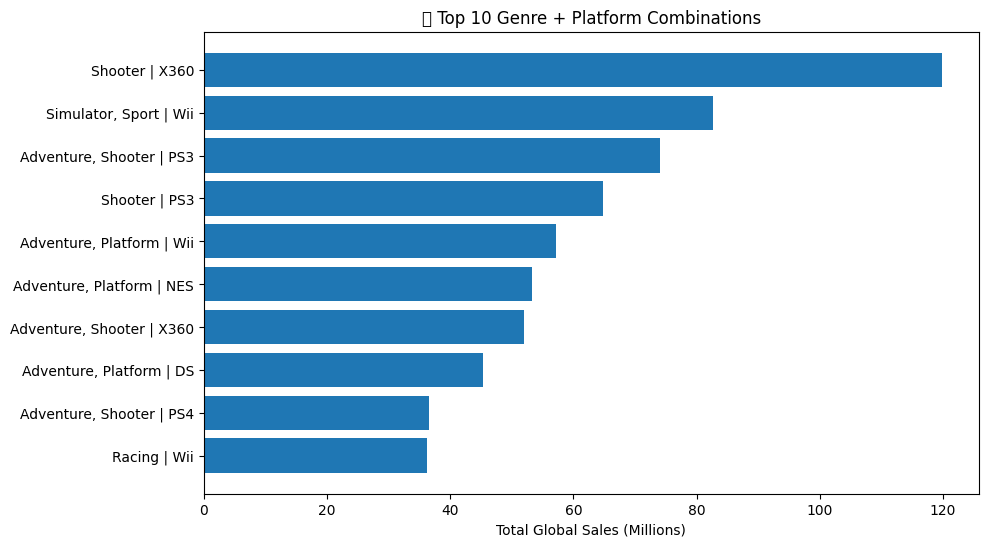

In [ ]:
# 29 🎉 What are the top-performing combinations of Genre + Platform?

# Fill missing sales
merged['Global_Sales'] = merged['Global_Sales'].fillna(0)

# Group by Genre + Platform and sum sales
top_genre_platform = merged.groupby(['Genres','Platform'])['Global_Sales'].sum().reset_index()

# Sort descending and take top 10
top_genre_platform = top_genre_platform.sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_genre_platform['Genres'] + " | " + top_genre_platform['Platform'],
         top_genre_platform['Global_Sales'])
plt.xlabel("Total Global Sales (Millions)")
plt.title("🎉 Top 10 Genre + Platform Combinations")
plt.gca().invert_yaxis()  # Top item on top
plt.show()

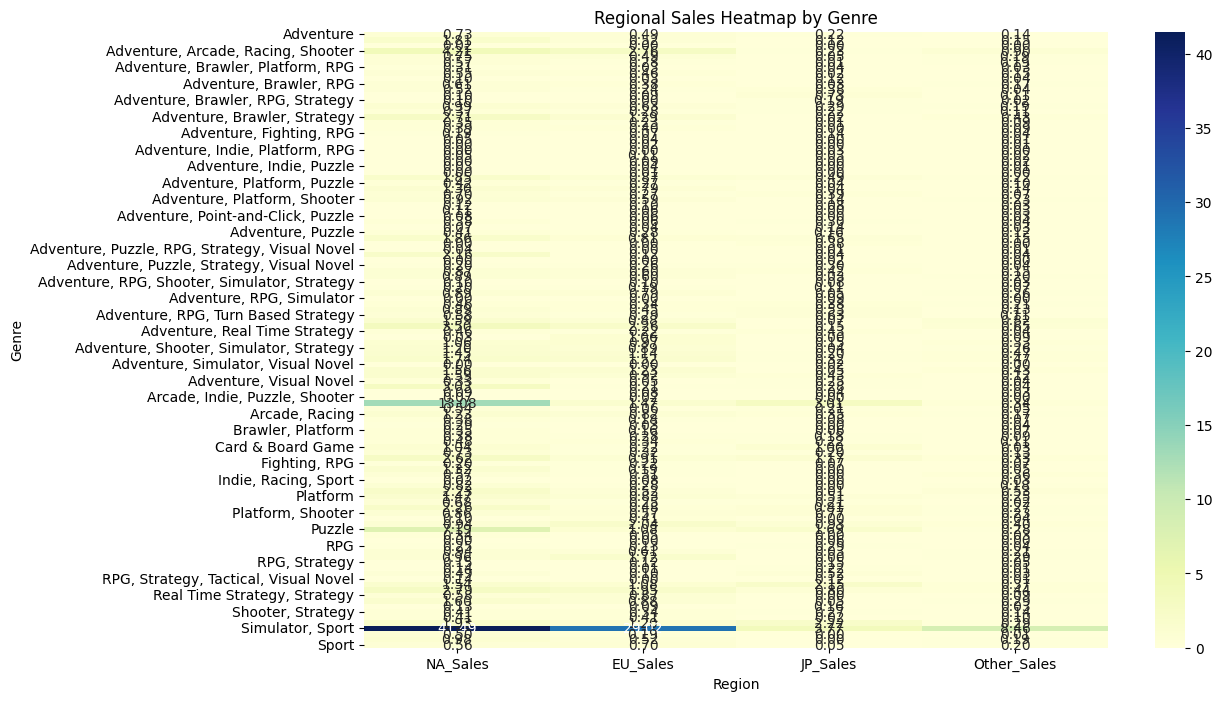

In [ ]:
# 30 What does a regional sales heatmap by genre reveal?

# Load merged or sales data
merged = pd.read_csv("merged_games_sales.csv")

# Fill NaNs
for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    merged[col] = merged[col].fillna(0)

# Aggregate sales per genre per region
genre_region_sales = merged.groupby('Genres')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(genre_region_sales, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Regional Sales Heatmap by Genre")
plt.ylabel("Genre")
plt.xlabel("Region")
plt.show()

#Connecting SQL